<a href="https://colab.research.google.com/github/ravichandranNa/AJ_ML_Library/blob/master/GCHackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_train = pd.read_csv('/content/drive/My Drive/Guided Community Hackathon/Train_eP48B9k.csv')
df_test = pd.read_csv('/content/drive/My Drive/Guided Community Hackathon/Test_jPKyvmK.csv')
submission = pd.read_csv('/content/drive/My Drive/Guided Community Hackathon/SampleSubmission_XkIpo3X.csv')

In [ ]:
df_train.head(2)

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,id_43823,28.0,management,single,tertiary,no,285.0,yes,no,unknown,26,jun,303.0,4.0,NaN,0,unknown,0
1,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,143.0,2.0,132.0,1,other,0


In [ ]:
df_test.head(2)

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome
0,id_17231,55.0,retired,married,tertiary,no,7136.0,no,no,cellular,13,aug,90.0,2.0,NaN,0,unknown
1,id_34508,24.0,blue-collar,single,secondary,no,179.0,yes,no,cellular,18,may,63.0,2.0,NaN,0,unknown


In [ ]:
df_train.isna().sum()

id                                      0
customer_age                          619
job_type                                0
marital                               150
education                               0
default                                 0
balance                               399
housing_loan                            0
personal_loan                         149
communication_type                      0
day_of_month                            0
month                                   0
last_contact_duration                 311
num_contacts_in_campaign              112
days_since_prev_campaign_contact    25831
num_contacts_prev_campaign              0
prev_campaign_outcome                   0
term_deposit_subscribed                 0
dtype: int64

In [ ]:
# df_train['data'] = 'train'
# df_test['data'] = 'test'
combined = pd.concat([df_train,df_test])
combined.shape,df_train.shape,df_test.shape

((45211, 18), (31647, 18), (13564, 17))

In [ ]:
combined.isna().sum()

id                                      0
customer_age                          889
job_type                                0
marital                               231
education                               0
default                                 0
balance                               580
housing_loan                            0
personal_loan                         223
communication_type                      0
day_of_month                            0
month                                   0
last_contact_duration                 433
num_contacts_in_campaign              157
days_since_prev_campaign_contact    36954
num_contacts_prev_campaign              0
prev_campaign_outcome                   0
term_deposit_subscribed             13564
dtype: int64

In [ ]:
cat_cols = ['job_type', 'marital', 'education', 'default', 'housing_loan',
       'personal_loan', 'communication_type', 'month', 'prev_campaign_outcome']

In [ ]:
cat_cols

['job_type',
 'marital',
 'education',
 'default',
 'housing_loan',
 'personal_loan',
 'communication_type',
 'month',
 'prev_campaign_outcome']

In [ ]:
!pip install --upgrade seaborn

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.11.0)


In [ ]:
%matplotlib inline

##Univariate Analysis

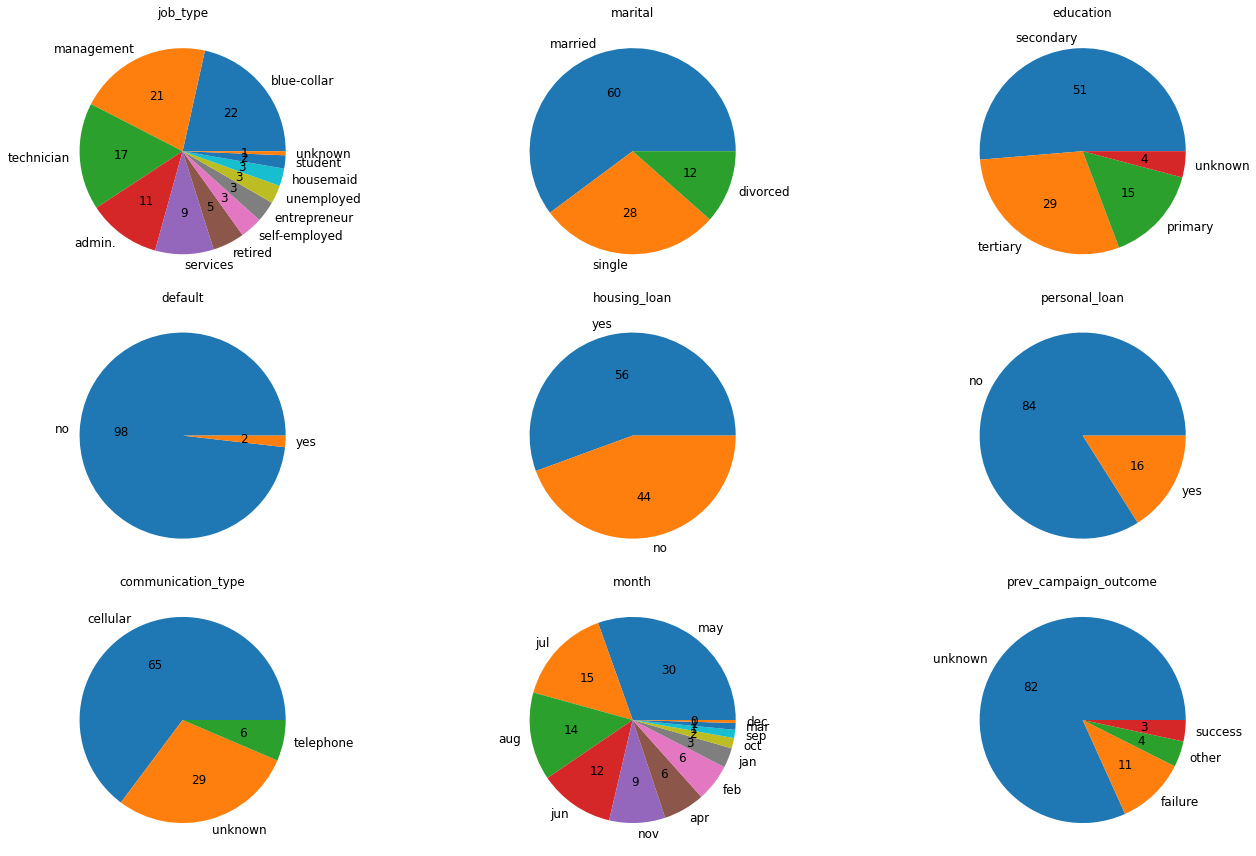

In [ ]:
fig, axes = plt.subplots(3,3, figsize=(20,12))
axes = [ax for axes_row in axes for ax in axes_row]

for i, col in enumerate(combined[cat_cols]):
    combined[col].value_counts()[::1].plot(kind='pie',ax=axes[i],title =col,autopct = '%.0f',fontsize = 12)
    axes[i].set_ylabel('')

plt.tight_layout()
    

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


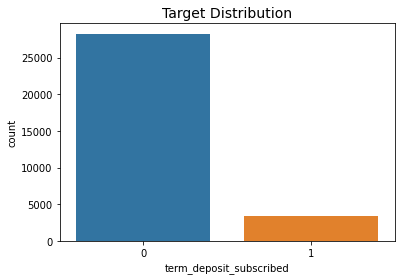

In [ ]:

ID_COL, TARGET_COL = 'id', 'term_deposit_subscribed'
df_train[TARGET_COL].value_counts(normalize=True)
_ = sns.countplot(df_train[TARGET_COL])
_ = plt.title("Target Distribution", fontsize=14)

##Multivariate Analysis

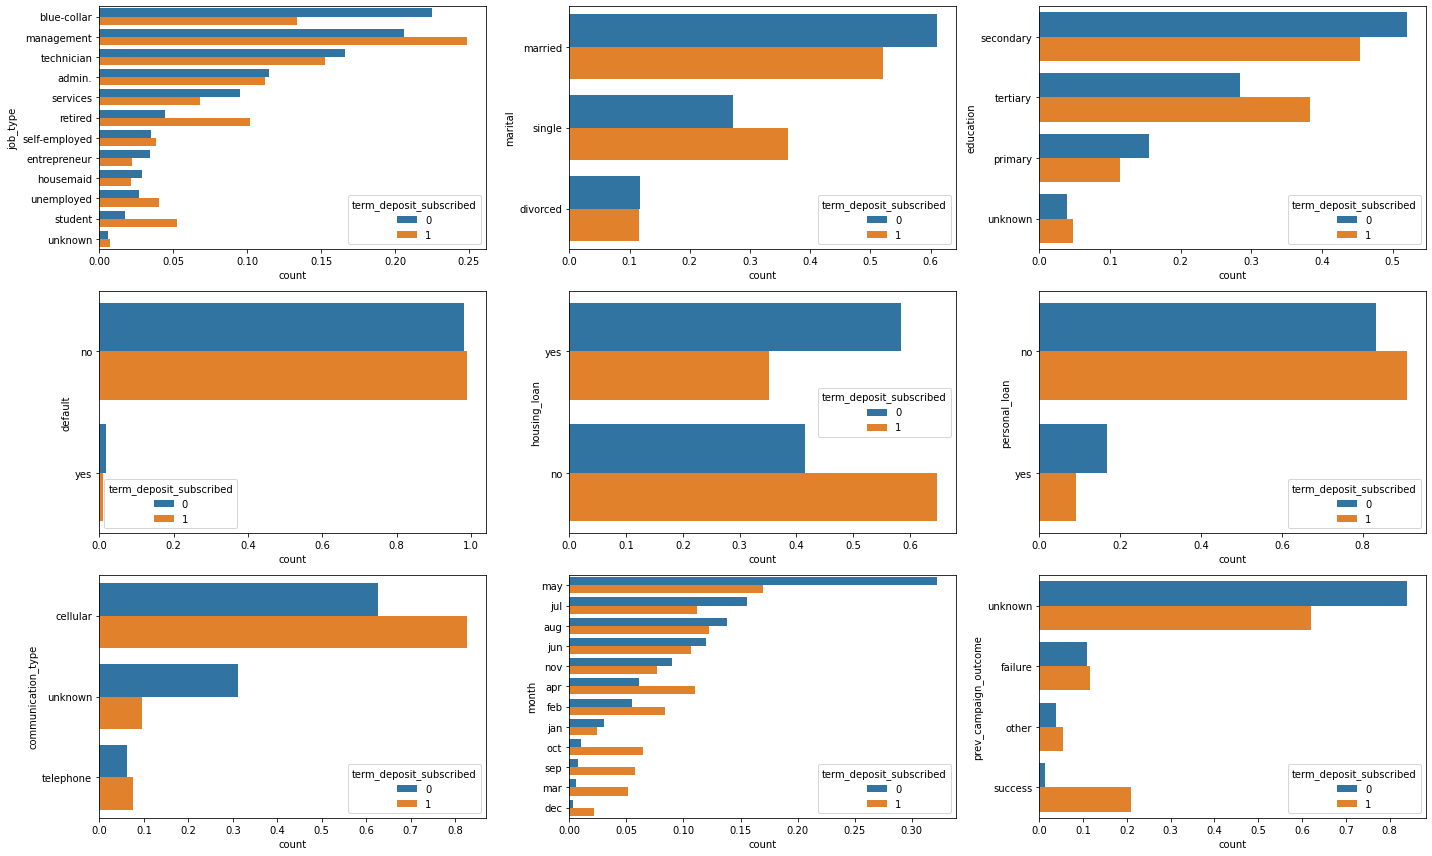

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(20, 12))
axes = [ax for axes_row in axes for ax in axes_row]

for i, c in enumerate(df_train[cat_cols]):
    fltr = df_train[TARGET_COL] == 0
    vc_a = df_train[fltr][c].value_counts(normalize=True).reset_index().rename({'index' : c, c: 'count'}, axis=1)

    vc_b = df_train[~fltr][c].value_counts(normalize=True).reset_index().rename({'index' : c, c: 'count'}, axis=1)

    vc_a[TARGET_COL] = 0
    vc_b[TARGET_COL] = 1

    df = pd.concat([vc_a, vc_b]).reset_index(drop = True)

    _ = sns.barplot(y = c, x = 'count', data =df , hue=TARGET_COL, ax=axes[i])
    
_ = plt.tight_layout()

##Filling NAs with respect to means of each category in Job_Type

In [ ]:
means = combined.groupby('job_type')['customer_age'].transform(np.mean)
filled_means = means.fillna(1)
# this corrects the last problem
combined['customer_age'] = combined['customer_age'].fillna(filled_means).round()

In [ ]:
means = combined.groupby('job_type')['balance'].transform(np.mean)
filled_means = means.fillna(1)
# this corrects the last problem
combined['balance'] = combined['balance'].fillna(filled_means).round()

In [ ]:
means = combined.groupby('communication_type')['last_contact_duration'].transform(np.mean)
filled_means = means.fillna(1)

combined['last_contact_duration'] = combined['last_contact_duration'].fillna(filled_means).round()

In [ ]:
combined['marital'] = combined['marital'].fillna('married')
combined['personal_loan'] = combined['personal_loan'].fillna('no')

In [ ]:
means = combined.groupby('communication_type')['num_contacts_in_campaign'].transform(np.mean)
filled_means = means.fillna(1)

combined['num_contacts_in_campaign'] = combined['num_contacts_in_campaign'].fillna(filled_means).round()

##Feature Engineering: Adding new coloumn last contacted days

In [ ]:
combined.day_of_month = combined.day_of_month.astype('str')
combined['year'] = '2019'
combined['date'] = combined[['day_of_month', 'month','year']].apply(lambda x: ''.join(x), axis=1)
combined['fin_date'] = '31-12-2019'
combined['date'] = pd.to_datetime(combined['date'],format='%d%b%Y')
combined['fin_date'] = pd.to_datetime(combined['fin_date'],format='%d-%m-%Y')
combined['last_contacted_days'] = (combined['fin_date'] - combined['date']).dt.days
ref_cat = combined[['month','day_of_month','days_since_prev_campaign_contact','year','date','fin_date']]
combined.drop(ref_cat,axis=1,inplace=True)

In [ ]:
combined.head()

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed,last_contacted_days
0,id_43823,28.0,management,single,tertiary,no,285.0,yes,no,unknown,303.0,4.0,0,unknown,0.0,188
1,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,143.0,2.0,1,other,0.0,43
2,id_10523,46.0,technician,married,secondary,no,656.0,no,no,cellular,101.0,4.0,0,unknown,0.0,329
3,id_43951,34.0,services,single,secondary,no,2.0,yes,no,unknown,127.0,3.0,0,unknown,0.0,225
4,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,49.0,2.0,0,unknown,0.0,232


##Label Encoding 

In [ ]:
from sklearn.preprocessing import LabelEncoder
#Fetch features of type Object
objFeatures = combined[['default','housing_loan','personal_loan']]

#Iterate a loop for features of type object
le = LabelEncoder()

for feat in objFeatures:
    combined[feat] = le.fit_transform(combined[feat].astype(str))

combined.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 45211 entries, 0 to 13563
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          45211 non-null  object 
 1   customer_age                45211 non-null  float64
 2   job_type                    45211 non-null  object 
 3   marital                     45211 non-null  object 
 4   education                   45211 non-null  object 
 5   default                     45211 non-null  int64  
 6   balance                     45211 non-null  float64
 7   housing_loan                45211 non-null  int64  
 8   personal_loan               45211 non-null  int64  
 9   communication_type          45211 non-null  object 
 10  last_contact_duration       45211 non-null  float64
 11  num_contacts_in_campaign    45211 non-null  float64
 12  num_contacts_prev_campaign  45211 non-null  int64  
 13  prev_campaign_outcome       452

##Creating Weight of Evidence for certain columns

In [ ]:
def woe_discrete(df, discrete_variable_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variable_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

In [ ]:
train_y = df_train['term_deposit_subscribed']
train_x = df_train.drop('term_deposit_subscribed',axis=1)

##Ploting Weight of Evidence

In [ ]:
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[: , 0].apply(str))
    y = df_WoE['WoE']
    plt.figure(figsize = (8, 5))
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('Weight of Evidence')
    plt.title(str('Weight of Evidence by ' + df_WoE.columns[0]))
    plt.xticks(rotation = rotation_of_x_axis_labels)

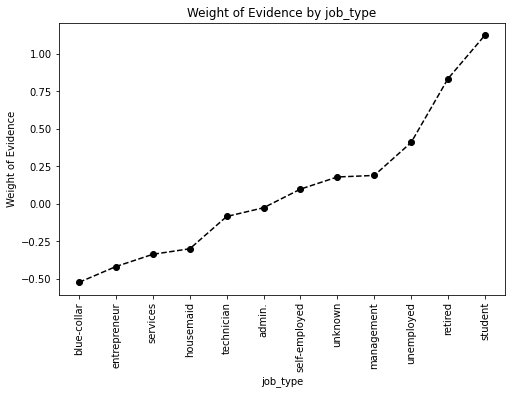

In [ ]:
df_temp = woe_discrete(train_x,'job_type',train_y)
plot_by_woe(df_temp,90)

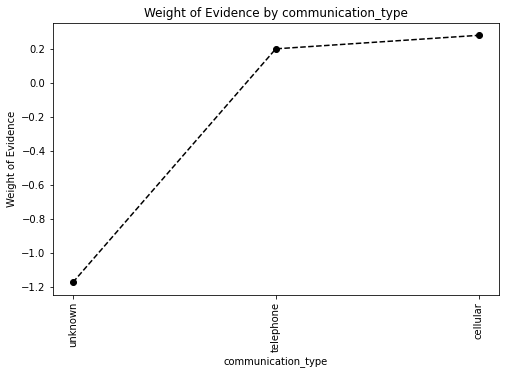

In [ ]:
df_temp = woe_discrete(train_x,'communication_type',train_y)
plot_by_woe(df_temp,90)

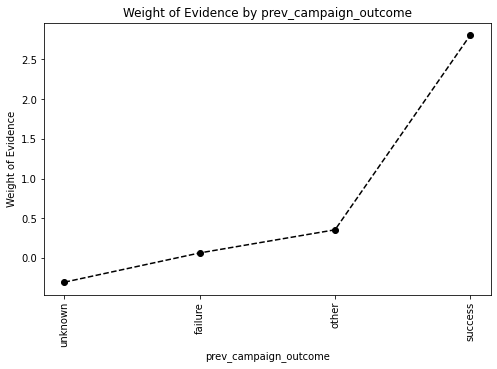

In [ ]:
df_temp = woe_discrete(train_x,'prev_campaign_outcome',train_y)
plot_by_woe(df_temp,90)

##Clubbing some features of the columns into one for better result

In [ ]:
combined['job_type'] = combined['job_type'].map({'blue_collar':0,'housemaid': 1,'services': 1,'entrepreneur':1,'technician':2,'admin.':2,'self-employed':3,
       'unknown':3, 'management':3,'unemployed':4,'retired':5,'student':6})
combined['communication_type'] = combined['communication_type'].map({'telephone': 1,'cellular':1,'unknown':0})
combined['prev_campaign_outcome'] = combined['prev_campaign_outcome'].map({'unknown': 0,'failure': 1,'other':1,'sucess':1})

##Creating Dummies

In [ ]:
combined = pd.get_dummies(data=combined, columns=['job_type', 'marital','education','personal_loan','communication_type','prev_campaign_outcome'],drop_first=True)
combined.head(3)

,id,customer_age,default,balance,housing_loan,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed,last_contacted_days,job_type_2.0,job_type_3.0,job_type_4.0,job_type_5.0,job_type_6.0,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,personal_loan_1,communication_type_1,prev_campaign_outcome_1.0
0,id_43823,28.0,0,285.0,1,303.0,4.0,0,0.0,188,0,1,0,0,0,0,1,0,1,0,0,0,0
1,id_32289,34.0,0,934.0,0,143.0,2.0,1,0.0,43,0,0,0,0,0,1,0,1,0,0,1,1,1
2,id_10523,46.0,0,656.0,0,101.0,4.0,0,0.0,329,1,0,0,0,0,1,0,1,0,0,0,1,0


In [ ]:
combined[['customer_age','balance','last_contact_duration','num_contacts_in_campaign']] = combined[['customer_age','balance','last_contact_duration','num_contacts_in_campaign']].astype(int)

In [ ]:
ID_COL, TARGET_COL = 'id', 'term_deposit_subscribed'


In [ ]:
# Splitting
train_proc, test_proc = combined[:df_train.shape[0]], combined[df_train.shape[0]:].reset_index(drop = True)
features = [c for c in train_proc.columns if c not in [ID_COL, TARGET_COL]]

In [ ]:
len(features)

21

In [ ]:
from sklearn.model_selection import train_test_split
trn, val = train_test_split(train_proc, test_size=0.2, random_state = 1, stratify = train_proc[TARGET_COL])

###### Input to our model will be the features
X_trn, X_val = trn[features], val[features]

###### Output of our model will be the TARGET_COL
y_trn, y_val = trn[TARGET_COL], val[TARGET_COL]

##### Features for the test data that we will be predicting
X_test = test_proc[features]

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
_ = scaler.fit(X_trn)

X_trn = scaler.transform(X_trn)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

##Building Models

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from lightgbm import LGBMClassifier

from xgboost import XGBClassifier

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_colwidth', -1)

import warnings
warnings.simplefilter('ignore')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.


##Logistic Regression

In [ ]:
clf = LogisticRegression(random_state = 1)
_ = clf.fit(X_trn, y_trn)

thr = .21
preds_val = clf.predict_proba(X_val)[:,1]
pred_val1 = np.where(preds_val>thr,1,0)

f1_score(y_val, pred_val1)

0.5100584036340039

In [ ]:
preds_test_logs = clf.predict(X_test)


##Decision Tree Classifier

In [ ]:
clf = DecisionTreeClassifier(random_state = 1)
_ = clf.fit(X_trn, y_trn)
thr = .3
preds_val = clf.predict_proba(X_val)[:,1]
pred_val1 = np.where(preds_val>thr,1,0)

f1_score(y_val, pred_val1)

0.5477239353891337

In [ ]:
preds_test_decisiontree = clf.predict(X_test)


## Hyper Parameter Tuning 

In [ ]:

from sklearn.model_selection import RandomizedSearchCV

hyperparam_combs = {
    'max_depth': [4, 6, 8, 10, 12, 14, 16],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 10, 20, 30, 40],
    'max_features': [0.2, 0.4, 0.6, 0.8, 1],
    'max_leaf_nodes': [8, 16, 32, 64, 128,256],
    'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2}, {0: 1, 1: 3}, {0: 1, 1: 4}, {0: 1, 1: 5}]
}

clf = RandomizedSearchCV(DecisionTreeClassifier(),
                         hyperparam_combs,
                         scoring='f1',
                         random_state=1,
                         n_iter=20)

search = clf.fit(train_proc[features], train_proc[TARGET_COL])

search.best_params_

{'class_weight': {0: 1, 1: 3},
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 0.8,
 'max_leaf_nodes': 128,
 'min_samples_split': 40}

In [ ]:

optimal_params = {'class_weight': {0: 1, 1: 4},
 'criterion': 'entropy',
 'max_depth': 14,
 'max_features': 0.8,
 'max_leaf_nodes': 32,
 'min_samples_split': 10}

clf = DecisionTreeClassifier(random_state = 1, **optimal_params)
_ = clf.fit(X_trn, y_trn)

preds_val = clf.predict(X_val)

f1_score(y_val, preds_val)

0.5747592498732893

In [ ]:
preds_test_randomsearch = clf.predict(X_test)

In [ ]:
from sklearn.model_selection import StratifiedKFold
def run_clf_kfold(clf, train, test, features):

  N_SPLITS = 5

  oofs = np.zeros(len(train))
  preds = np.zeros((len(test)))

  folds = StratifiedKFold(n_splits = N_SPLITS)

  for fold_, (trn_idx, val_idx) in enumerate(folds.split(train, train[TARGET_COL])):
    print(f'\n------------- Fold {fold_ + 1} -------------')

    ############# Get train, validation and test sets along with targets ################
  
    ### Training Set
    X_trn, y_trn = train[features].iloc[trn_idx], target.iloc[trn_idx]

    ### Validation Set
    X_val, y_val = train[features].iloc[val_idx], target.iloc[val_idx]

    ### Test Set
    X_test = test[features]

    ############# Scaling Data ################
    scaler = StandardScaler()
    _ = scaler.fit(X_trn)

    X_trn = scaler.transform(X_trn)
    X_val = scaler.transform(X_val)
    X_test = scaler.transform(X_test)


    ############# Fitting and Predicting ################

    _ = clf.fit(X_trn, y_trn)

    ### Instead of directly predicting the classes we will obtain the probability of positive class.
    preds_val = clf.predict_proba(X_val)[:, 1]
    preds_test = clf.predict_proba(X_test)[:, 1]

    fold_score = f1_score(y_val, preds_val.round())
    print(f'\nF1 score for validation set is {fold_score}')

    oofs[val_idx] = preds_val
    preds += preds_test / N_SPLITS


  oofs_score = f1_score(target, oofs.round())
  print(f'\n\nF1 score for oofs is {oofs_score}')

  return oofs, preds

In [ ]:
target = df_train[TARGET_COL]

In [ ]:
dt_params = {'class_weight': {0: 1, 1: 2},
             'criterion': 'gini',
             'max_depth': 14,
             'max_features': 0.8,
             'max_leaf_nodes': 128,
             'min_samples_split': 20,
             'random_state': 1
             }

clf = DecisionTreeClassifier(**dt_params)
        

dt_oofs, dt_preds = run_clf_kfold(clf, train_proc, test_proc, features)


------------- Fold 1 -------------

F1 score for validation set is 0.625615763546798

------------- Fold 2 -------------

F1 score for validation set is 0.6243781094527363

------------- Fold 3 -------------

F1 score for validation set is 0.6224677716390423

------------- Fold 4 -------------

F1 score for validation set is 0.6266996291718171

------------- Fold 5 -------------

F1 score for validation set is 0.6136101499423299


F1 score for oofs is 0.6224278582734689


In [ ]:
dt_preds_rounded_decisionclassifier = dt_preds.round()

In [ ]:
from lightgbm import LGBMClassifier

clf = LGBMClassifier()
lgb_oofs, lgb_preds = run_clf_kfold(clf, train_proc, test_proc, features)


------------- Fold 1 -------------

F1 score for validation set is 0.5828662930344275

------------- Fold 2 -------------

F1 score for validation set is 0.6142969363707776

------------- Fold 3 -------------

F1 score for validation set is 0.5863453815261044

------------- Fold 4 -------------

F1 score for validation set is 0.5857605177993527

------------- Fold 5 -------------

F1 score for validation set is 0.5778491171749599


F1 score for oofs is 0.5895343254920787


In [ ]:
lgb_preds_rounded = lgb_preds.round()

##Optimal Threshold Score 

In [ ]:
thresholds = np.arange(0, 100)/100
for thresh in thresholds:
  oofs_rounded = (lgb_oofs > thresh) * 1
  thresh_score = f1_score(target, oofs_rounded)
#   print(f'Threshold {thresh}: {thresh_score}')

In [ ]:
def get_optimal_f1_thresh(target, oofs):
  thresholds = np.arange(0, 100)/100
  thresh_scores = []
  for thresh in thresholds:
    oofs_rounded = (lgb_oofs > thresh) * 1
    thresh_score = f1_score(target, oofs_rounded)
    thresh_scores.append(thresh_score)
  
  all_thresholds_and_scores = pd.Series(index = thresholds, data = thresh_scores)
  all_thresholds_and_scores.plot(figsize=(10, 6), fontsize=14)
  
  plt.xlabel('Threshold', fontsize=14)
  plt.ylabel('F1 Score', fontsize=14)

  return all_thresholds_and_scores.sort_values(ascending=False).index.values[0]

Optimal threhold is 0.29


0.6570388349514563

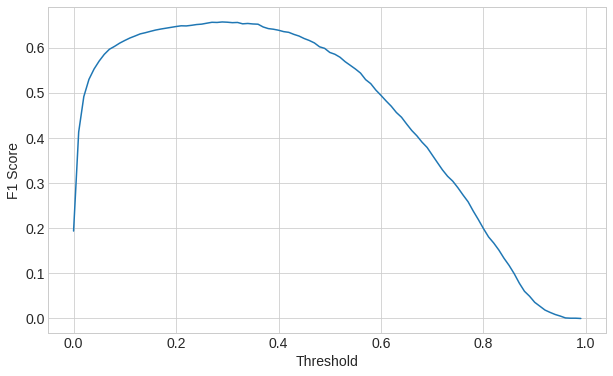

In [ ]:
optimal_thresh = get_optimal_f1_thresh(target, lgb_oofs)
print(f'Optimal threhold is {optimal_thresh}')
f1_score(target, (lgb_oofs > optimal_thresh) * 1)

In [ ]:
lgb_preds_rounded = (lgb_preds > optimal_thresh) * 1

In [ ]:
del df_train['days_since_prev_campaign_contact']

In [ ]:
def run_gradient_boosting(clf, fit_params, train, test, features):
  N_SPLITS = 5
  oofs = np.zeros(len(train_proc))
  preds = np.zeros((len(test_proc)))

  folds = StratifiedKFold(n_splits = N_SPLITS)

  for fold_, (trn_idx, val_idx) in enumerate(folds.split(train, train[TARGET_COL])):
    print(f'\n------------- Fold {fold_ + 1} -------------')

    ### Training Set
    X_trn, y_trn = train[features].iloc[trn_idx], target.iloc[trn_idx]

    ### Validation Set
    X_val, y_val = train[features].iloc[val_idx], target.iloc[val_idx]

    ### Test Set
    X_test = test[features]

    scaler = StandardScaler()
    _ = scaler.fit(X_trn)

    X_trn = scaler.transform(X_trn)
    X_val = scaler.transform(X_val)
    X_test = scaler.transform(X_test)
    
    _ = clf.fit(X_trn, y_trn, eval_set = [(X_val, y_val)], **fit_params)

    ### Instead of directly predicting the classes we will obtain the probability of positive class.
    preds_val = clf.predict_proba(X_val)[:, 1]
    preds_test = clf.predict_proba(X_test)[:, 1]

    fold_score = f1_score(y_val, preds_val.round())
    print(f'\nF1 score for validation set is {fold_score}')

    oofs[val_idx] = preds_val
    preds += preds_test / N_SPLITS


  oofs_score = f1_score(target, oofs.round())
  print(f'\n\nF1 score for oofs is {oofs_score}')

  return oofs, preds

In [ ]:
clf = LGBMClassifier(n_estimators = 1000,
                        learning_rate = 0.01,
                        colsample_bytree = 0.76
                        )
fit_params = {'verbose': 1000, 'early_stopping_rounds': 1000}

lgb_oofs, lgb_preds = run_gradient_boosting(clf, fit_params, train_proc, test_proc, features)



------------- Fold 1 -------------
Training until validation scores don't improve for 1000 rounds.
[1000]	valid_0's binary_logloss: 0.164159
Did not meet early stopping. Best iteration is:
[698]	valid_0's binary_logloss: 0.163824

F1 score for validation set is 0.5726141078838173

------------- Fold 2 -------------
Training until validation scores don't improve for 1000 rounds.
[1000]	valid_0's binary_logloss: 0.156722
Did not meet early stopping. Best iteration is:
[1000]	valid_0's binary_logloss: 0.156722

F1 score for validation set is 0.6086956521739131

------------- Fold 3 -------------
Training until validation scores don't improve for 1000 rounds.
[1000]	valid_0's binary_logloss: 0.162026
Did not meet early stopping. Best iteration is:
[1000]	valid_0's binary_logloss: 0.162026

F1 score for validation set is 0.5854838709677419

------------- Fold 4 -------------
Training until validation scores don't improve for 1000 rounds.
[1000]	valid_0's binary_logloss: 0.158679
Did not me

Optimal threhold is 0.28
Optimized F1 is 0.6603547459252158


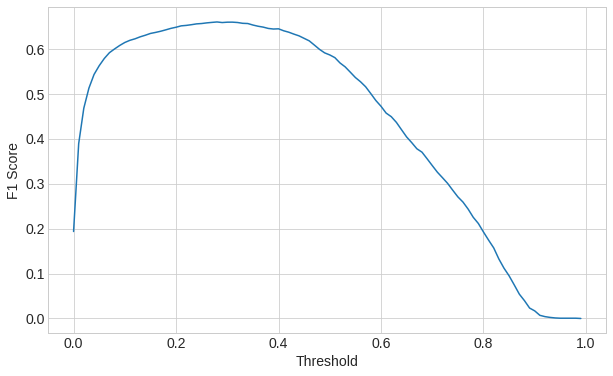

In [ ]:
optimal_thresh = get_optimal_f1_thresh(target, lgb_oofs)
print(f'Optimal threhold is {optimal_thresh}')
optimized_f1 = f1_score(target, (lgb_oofs > optimal_thresh) * 1)
print(f'Optimized F1 is {optimized_f1}')

In [ ]:
lgb_preds_rounded = (lgb_preds > optimal_thresh) * 1


#Submission

In [ ]:
from collections import Counter
submission['term_deposit_subscribed'] = lgb_preds_rounded
submission.to_csv('finalmodel.csv')
Counter(submission['term_deposit_subscribed'])

Counter({0: 11364, 1: 2200})